In [16]:
!pip install pandas scikit-learn numpy
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------------- ----------------------- 61.4/165.5 kB 550.5 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.5 kB 731.4 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 893.0 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 893.0 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 893.0 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 522.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 6.4 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.3 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## DATA EXTRACTION


In [30]:
import pandas as pd

# TRAINING DATAFRAME
col = [ 'TITLE', 'GENRE', 'DESCRIPTION']
df_train = pd.read_csv('train_data.txt' , delimiter=':::' , engine='python' , names=col , index_col=0 )
print("df_train:\n",df_train.head())

# TESTING DATAFRAME
col = [ 'TITLE', 'GENRE', 'DESCRIPTION']
df_test = pd.read_csv('test_data_solution.txt' , delimiter=':::' , engine='python' , names=col , index_col=0 )
print("df_test:\n",df_test.head())

df_train:
                                 TITLE       GENRE  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  
df_test:
                            TITLE          GENRE  \
1          Edgar's Lunch (1998)       thriller    
2      La guerra de papá (1977)         comedy    
3   Off the Beaten Track (2010)    documentary    
4        Meu Amigo Hindu (2015)          drama    
5             Er nu zhai (1955)          drama    

                       

## DATA PREPROCESSING

In [31]:
if not df_train['TITLE'].empty:
    df_train['DESCRIPTION'] = df_train['TITLE'] + " " + df_train['DESCRIPTION']
if not df_test['TITLE'].empty:
    df_test['DESCRIPTION'] = df_test['TITLE'] + " " + df_test['DESCRIPTION']

In [32]:
#  IN BOTH TRAINING AND TEST DATASETS CONVERT THE 'DESCRIPTION' COLUMN TO LOWERCASE
df_train.loc[:,'DESCRIPTION'] = df_train['DESCRIPTION'].astype(str).str.lower()
df_test.loc[:,'DESCRIPTION'] = df_test['DESCRIPTION'].astype(str).str.lower()

In [33]:
# IN TRAINING AND TEST DATASETS DROP THE 'TITLE' COLUMN 
df_train.drop(columns=['TITLE'], inplace = True)
df_test.drop(columns=['TITLE'], inplace = True)

In [34]:
# DISPLAY INFORMATION ABOUT THE TRAINING DATASET
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GENRE        54214 non-null  object
 1   DESCRIPTION  54214 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


,GENRE,DESCRIPTION
1,drama,oscar et la dame rose (2009) listening in t...
2,thriller,cupid (1997) a brother and sister with a pa...
3,adult,"young, wild and wonderful (1980) as the bus..."
4,drama,the secret sin (1915) to help their unemplo...
5,drama,the unrecovered (2007) the film's title ref...


In [8]:
# DISPLAY INFORMATION ABOUT THE TRAINING DATASET
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GENRE        54200 non-null  object
 1   DESCRIPTION  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


,GENRE,DESCRIPTION
1,thriller,edgar's lunch (1998) l.r. brane loves his l...
2,comedy,"la guerra de papá (1977) spain, march 1964:..."
3,documentary,off the beaten track (2010) one year in the...
4,drama,"meu amigo hindu (2015) his father has died,..."
5,drama,er nu zhai (1955) before he was known inter...


## DATA CLEANING

In [35]:
#  IN THE TRAINING DATASET CHECK FOR DUPLICATE ROWS
print("TRAINING DUPLICATES:", df_train.duplicated().sum())

#   IN THE TEST DATASET CHECK FOR DUPLICATE ROWS
print("TEST DUPLICATES:", df_test.duplicated().sum())

TRAINING DUPLICATES: 2
TEST DUPLICATES: 5


In [36]:
#  IN THE TRAINING DATASET DROP DUPLICATE ROWS
df_train = df_train.drop_duplicates(keep ='first')

#  IN THE TEST DATASET DROP DUPLICATE ROWS
df_test = df_test.drop_duplicates(keep = 'first')

In [38]:
# VERIFY NO DUPLICATES REMAIN IN THE TRAINING DATASET
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())

# VERIFY NO DUPLICATES REMAIN IN THE TEST DATASET
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [39]:
# DISPLAY THE SHAPE OF THE TRAINING DATASET AFTER REMOVING DUPLICATES
print(df_train.shape)

# DISPLAY THE SHAPE OF THE TEST DATASET AFTER REMOVING DUPLICATES
print(df_test.shape)

(54212, 2)
(54195, 2)


In [40]:
#  FOR TRAINING AND TEST DATASETS SEPARATE FEATURES AND LABELS
x_train_full = df_train['DESCRIPTION']
y_train_full = df_train['GENRE']

x_test = df_test['DESCRIPTION']
y_test = df_test['GENRE']


## DATA VISUALIZATION

C:\Users\simran\AppData\Local\Temp\ipykernel_14908\3359043742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENRE' , data=df_train , order=df_train['GENRE'].value_counts().index ,palette='tab10')


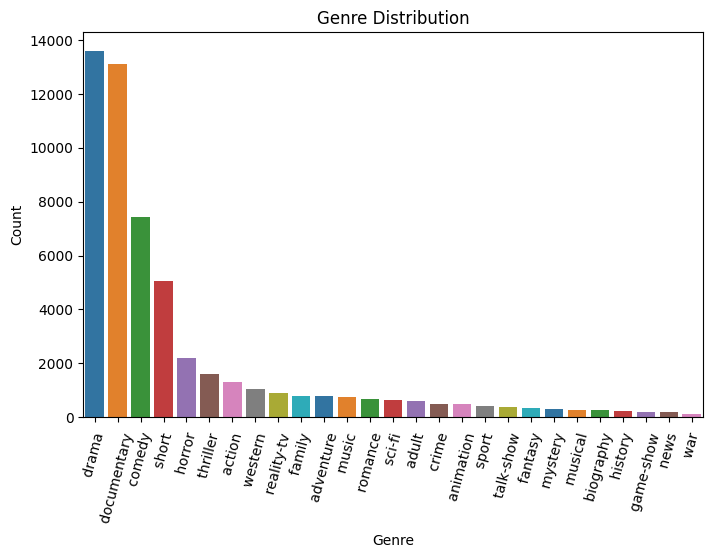

In [41]:
# IMPORTING VISUALIZATION LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(8,5))
sns.countplot(x='GENRE' , data=df_train , order=df_train['GENRE'].value_counts().index ,palette='tab10')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

In [18]:
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
from sklearn.model_selection import train_test_split

# SPLIT THE TRAINING DATA INTO TRAINING AND VALIDATION SETS
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [19]:
# DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST FEATURE SETS
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

print('\n')

# DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST LABEL SETS
print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

(43369,)
(10843,)
(54195,)


(43369,)
(10843,)
(54195,)


## FEATURE EXTRACTION

In [20]:
# IMPORT TfidfVectorizer FROM sklearn FOR FEATURE EXTRACTION
from sklearn.feature_extraction.text import TfidfVectorizer

# INITIALIZE TF-IDF VECTORIZER
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

# FIT AND TRANSFORM THE TRAINING FEATURES, AND TRANSFORM THE VALIDATION AND TEST FEATURES
X_train_vec = tfidf.fit_transform(X_train)
# print(X_train.shape)
# print(X_train_vec)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

## MODEL TRAINING (NAIVE BAYES)

In [21]:
# IMPORT MULTINOMIAL NAIVE BAYES CLASSIFIER FROM sklearn
from sklearn.naive_bayes import MultinomialNB

# TRAIN THE MULTINOMIAL NAIVE BAYES CLASSIFIER
nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

## MODEL PREDICTIONS

In [22]:
# MAKE PREDICTIONS ON THE VALIDATION SET
y_pred_val = nb.predict(X_val_vec)

## MODEL EVALUATION

In [23]:
# IMPORT EVALUATION METRICS FROM sklearn
from sklearn.metrics import accuracy_score, classification_report

# EVALUATE THE MODEL ON THE VALIDATION SET
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5238402656091488
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.65      0.10      0.18       254
       adult        0.17      0.01      0.02       117
   adventure        0.54      0.04      0.08       158
   animation        0.00      0.00      0.00       105
   biography        0.00      0.00      0.00        57
      comedy        0.53      0.43      0.47      1480
       crime        0.00      0.00      0.00       105
 documentary        0.57      0.89      0.69      2626
       drama        0.46      0.83      0.59      2698
      family        0.00      0.00      0.00       155
     fantasy        0.00      0.00      0.00        78
   game-show        1.00      0.23      0.37        31
     history        0.00      0.00      0.00        42
      horror        0.76      0.39      0.51       430
       music        0.77      0.07      0.12       147
     musical        0.00      0.00      0.00 

In [24]:
# MAKE PREDICTIONS ON THE TEST SET
y_pred_test = nb.predict(X_test_vec)

# EVALUATE THE MODEL ON THE TEST SET
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.5205277239597749
Test Classification Report:
               precision    recall  f1-score   support

      action        0.62      0.09      0.16      1314
       adult        0.48      0.05      0.10       590
   adventure        0.77      0.05      0.09       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.52      0.41      0.46      7446
       crime        0.00      0.00      0.00       505
 documentary        0.56      0.88      0.69     13096
       drama        0.46      0.83      0.59     13609
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.30      0.45       193
     history        0.00      0.00      0.00       243
      horror        0.71      0.35      0.46      2204
       music        0.82      0.09      0.17       731
     musical        0.00      0.00      0.00       276
 